# WORK IN PROGRESS

- THIS DATA AND THIS MODEL ARE STILL BEING TRANSFORMED AND ASSESSED

In [1]:
#import dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle
import bz2
import gzip

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, roc_curve, auc
from itertools import cycle

In [2]:
#read in training dataset
df = pd.read_csv('Resources/cpl_train_cleaned.csv')

In [3]:
df.head()

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High spent Small value payments,312.494089,Good
1,-500,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low spent Medium value payments,331.209863,Good
2,23,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low spent Small value payments,223.451310,Good
3,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High spent Medium value payments,341.489231,Good
4,23,NaN,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93465 entries, 0 to 93464
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       93465 non-null  int64  
 1   SSN                       0 non-null      float64
 2   Occupation                93465 non-null  object 
 3   Annual_Income             93465 non-null  float64
 4   Monthly_Inhand_Salary     79447 non-null  float64
 5   Num_Bank_Accounts         93465 non-null  int64  
 6   Num_Credit_Card           93465 non-null  int64  
 7   Interest_Rate             93465 non-null  int64  
 8   Num_of_Loan               93465 non-null  int64  
 9   Type_of_Loan              82959 non-null  object 
 10  Delay_from_due_date       93465 non-null  int64  
 11  Num_of_Delayed_Payment    86910 non-null  float64
 12  Changed_Credit_Limit      91479 non-null  float64
 13  Num_Credit_Inquiries      91642 non-null  float64
 14  Credit

### Some More Cleaning

In [5]:
#investigate nan value of credit history age
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months', nan,
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 10 Months', '26 Years and 11 Months',
       '27 Years and 0 Months', '27 Years and 1 Months',
       '27 Years and 2 Months', '17 Years and 9 Months',
       '17 Years and 10 Months', '17 Years and 11 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '18 Years and 3 Months', '18 Years and 4 Months',
       '17 Years and 3 Months', '17 Years and 4 Months',
       '17 Years and 5 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Months', '32 Years and 0 Months',
       '32 Years and 2 Months', '32 Years and 3 Months',
       '32 Years and 5 Months', '32 Years and 6 Months',
       '30 Years and 

In [6]:
#Drop rows with nan value in Credit_Mix

#converted object to string to make accessing the nan value easier
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

# Saved dataframe with 'nan' row
df = df[df['Credit_History_Age'] != 'nan']

In [7]:
#Investigate empty value in Credit_Mix
df['Credit_Mix'].unique()

array([' ', 'Good', 'Standard', 'Bad'], dtype=object)

In [8]:
#Drop rows with empty value in Credit_Mix
df = df[df['Credit_Mix'] != ' ']

In [9]:
# investigate !@9#%8 value in Payment Behavior
df['Payment_Behaviour'].unique()

array(['Low spent Medium value payments',
       'Low spent Small value payments',
       'High spent Medium value payments', '!@9#%8',
       'High spent Large value payments',
       'High spent Small value payments',
       'Low spent Large value payments'], dtype=object)

In [10]:
#Drop rows with !@9#%8 value in Credit_Mix
df = df[df['Payment_Behaviour'] != '!@9#%8']

### Addressing the numerical columns with null values

- I will go through each numerical column and assess the best imputation method on a case by case basis
- Right now, I've opted to keep most outliers in the dataset because they may have some predictive power. This might change later.

In [11]:
#check values of age. After brief look at the csv, there appears to be unrealistic ages like negative values or values > 1000
df['Age'].unique()

array([-500,   23,   28, ..., 8425, 4808, 2263], dtype=int64)

In [12]:
#Lets drop any ages less than 0 and greater than 100. This seems safer them imputing because I'm not sure if those observations are real people.
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

<Axes: ylabel='Frequency'>

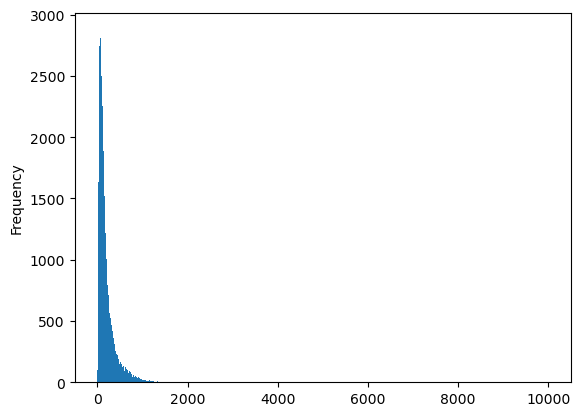

In [13]:
#histogram of feature with null values: Amount_invested_monthly
df['Amount_invested_monthly'].plot(kind='hist', bins = 1000)

In [14]:
# replace null values for the 'Amount_invested_monthly' with median value due to skewed data and outliers close to 10000
median = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

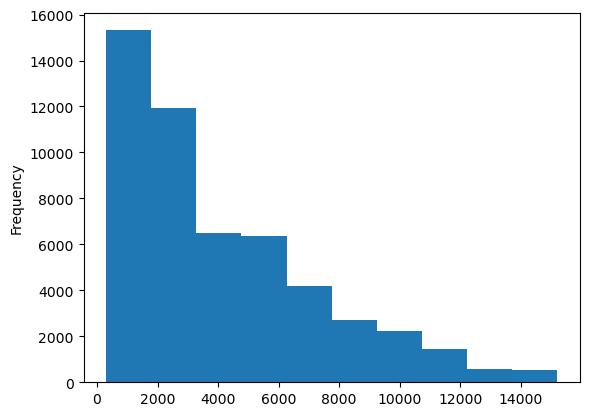

In [15]:
# histogram of feature with null values: Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].plot(kind='hist')

In [16]:
# replace null values for the 'Monthly_Inhand_Salary' with median value because the data is skewed
median = df['Monthly_Inhand_Salary'].median()
df['Monthly_Inhand_Salary'].fillna(median, inplace = True)

4397.0


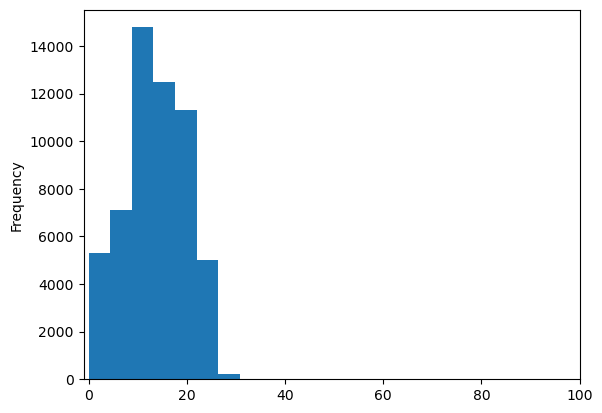

In [17]:
# histogram of feature with null values: Num_of_Delayed_Payment

# initial attempts to plot this histogram showed that it was skewed by a large outlier around at value 'max'
max = df['Num_of_Delayed_Payment'].max()

#set the limits of the graph to not display the outlier, so the rest of the data points appear more visible
df['Num_of_Delayed_Payment'].plot(kind ='hist', bins = 1000).set_xlim(-1, 100)
print(max)

In [18]:
# Data is approximately normal, but due to extremely high outlier in dataset, I will fill na values with the median
median = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

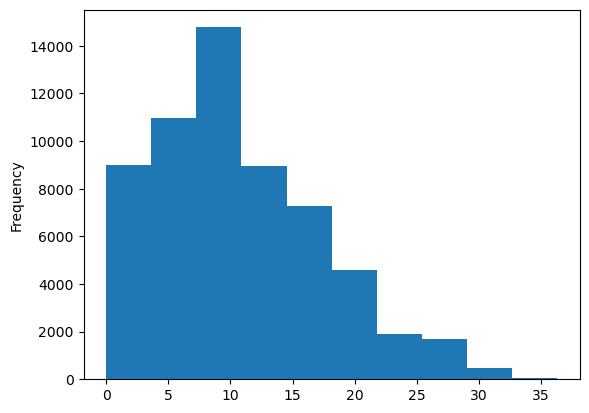

In [19]:
# histogram of feature with null values: Changed_Credit_Limit
df['Changed_Credit_Limit'].plot(kind = 'hist')

In [20]:
# replace null values with median due to skewed histogram
median = df['Changed_Credit_Limit'].median()
df['Changed_Credit_Limit'].fillna(median, inplace = True)

2594.0


(-1.0, 100.0)

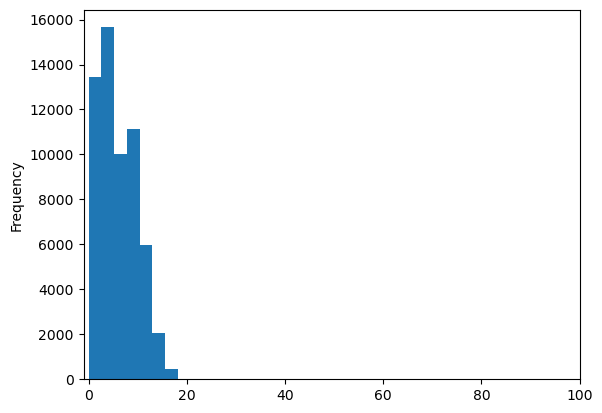

In [21]:
#  plot histogram of feature with null values: Num_Credit_Inquiries

# initial attempts to plot this histogram showed that it was skewed by a large outlier around at value 'max'
max = df['Num_Credit_Inquiries'].max()
print(max)

# set limits of x axis to exclude outlier
df['Num_Credit_Inquiries'].plot(kind = 'hist', bins = 1000).set_xlim(-1, 100)

In [22]:
#data is skewed with outliers so I will replace the na values with the median
median = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median, inplace = True)

<Axes: ylabel='Frequency'>

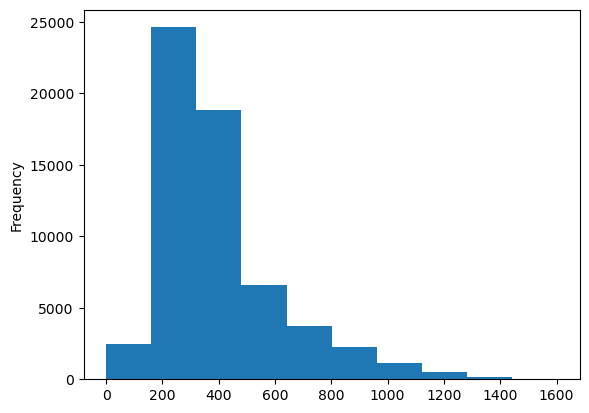

In [23]:
#  plot histogram of feature with null values: Monthly_Balance
df['Monthly_Balance'].plot(kind = 'hist')

In [24]:
#Data is skewed so I will fill na values with the median
median = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median, inplace = True)

### Addressing Categorical Columns
 - I will create dummy variables for categorical data and ordinal encode ordinal categorical data. This will be concacted to df after numerical data scaling.
 - Note: after initial attempt at this model, different types of encoding may improve accuracy.

In [25]:
#drop na values of Type_of_Loan
df.dropna(subset = ['Type_of_Loan'], axis = 0, inplace = True)

# These na values may be filled with another type of encoding later on

In [26]:
df['Type_of_Loan'].isna().sum()

0

In [27]:
# I am going to try frequency encoding these categorical variables instead to see if that improves model performance.
# Initial model accuracy before frequency encoding was: log = 72%, decision tree = 72%, random forest = 77%

# #create dummy df's for each non-ordinal categorical variable
# type_of_loan_dummies = pd.get_dummies(df['Type_of_Loan'])
# payment_of_min_amount_dummies = pd.get_dummies(df['Payment_of_Min_Amount'])
# payment_behaviour_dummies = pd.get_dummies(df['Payment_Behaviour'])
# occupation_dummies = pd.get_dummies(df['Occupation'])

In [28]:
# frequency encoding of categorical variables
type_of_loan_freq = df['Type_of_Loan'].value_counts()
payment_of_min_amount_freq = df['Payment_of_Min_Amount'].value_counts()
payment_behaviour_freq = df['Payment_Behaviour'].value_counts()
occupation_freq = df['Occupation'].value_counts()

In [29]:
type_of_loan_freq.unique()

array([842, 783, 777, 759, 748, 716, 710, 705, 699, 191, 161, 160, 155,
       153, 149, 147, 144, 143, 141, 140, 139, 136, 134, 133, 132, 129,
       128, 127, 126, 125, 123, 122, 121, 119, 118, 117, 115, 114, 113,
       111, 110, 108, 107, 106, 105, 104, 102, 101,  98,  96,  94,  92,
        91,  90,  89,  88,  87,  85,  79,  45,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [30]:
#mapping frequency of categorical variables onto dataframe
df['Occupation_freq_encoded'] = df['Occupation'].map(occupation_freq)
df['Type_of_Loan_freq_encoded'] = df['Type_of_Loan'].map(type_of_loan_freq )
df['Payment_of_Min_Amount_freq_encoded'] = df['Payment_of_Min_Amount'].map(payment_of_min_amount_freq)
df['Payment_Behaviour_freq_encoded'] = df['Payment_Behaviour'].map(payment_behaviour_freq)

In [31]:
#convert Credit_Mix to ordinal numerical column
target_list = ['Bad', 'Standard', 'Good']

# create codes for Credit_Mix: output should be 0 = 'Bad', 1 = 'Standard', 2 = 'Good'
df['Credit_Mix'] = pd.Categorical(df['Credit_Mix'], categories= target_list, ordered=True).codes

In [32]:
# convert Credit_History_Age from a string to a count of the months
def convert_to_months(duration_str):
    parts = duration_str.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

#converted the object 'Credit_History Age' a string and apply the convert_to_months function to the series to get the count of months
df['Credit_History_Age'] = df['Credit_History_Age'].astype(dtype='str').apply(convert_to_months)

In [33]:
#drop SSN column and categorical features that were converted to encoded variables
df.drop(['SSN', 'Type_of_Loan', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation'], axis = 1, inplace = True)

In [34]:
#check dataframe
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_freq_encoded,Type_of_Loan_freq_encoded,Payment_of_Min_Amount_freq_encoded,Payment_Behaviour_freq_encoded
2,23,19114.12,3088.874167,3,4,3,4,5,4.0,6.27,...,31.377862,268,49.574949,199.458074,223.451310,Good,3449,3,16899,15335
3,23,19114.12,1824.843333,3,4,3,4,6,14.0,11.27,...,24.797347,269,49.574949,41.420153,341.489231,Good,3449,3,16899,10264
5,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,22.537593,271,49.574949,178.344067,244.565317,Good,3449,3,16899,15335
7,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,24.464031,319,18.816215,104.291825,470.690627,Standard,3798,777,16899,15335
8,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,38.550848,320,18.816215,40.391238,484.591214,Good,3414,777,16899,7815


### Transforming the target variable/ splitting dataframe/ scaling data
- I will encode the ordinal below target variable and split the data into training and testing groups. Then I will scale the features.

In [35]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [36]:
#create ordered list from target column 'Credit_Score'
target_list = ['Poor', 'Standard', 'Good']

In [37]:
#split data into target and features

#This transforms the Credit_Score column into a 0 for poor, 1 for standard, and 2 for good
y = pd.Categorical(df['Credit_Score'], categories= target_list, ordered=True).codes

#create feature only df
X = df.drop(['Credit_Score'], axis = 1)

In [65]:
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int8), array([17094, 28699,  8451], dtype=int64))

In [38]:
#The Random Forest Model

# # Check final feature dataframe for correlation among features
# correlation_matrix = X.corr()
# plt.figure(figsize = (15,10))
# sns.heatmap(correlation_matrix, annot = True, center = 0)
# plt.show()

In [39]:
# # Let's try dropping some variables with strong correlations: Credit_Mix to start
# X.drop(['Credit_Mix'], axis = 1, inplace=True)

In [40]:
# I commented this out in order to apply frequency encoding to the variable

# # Concat dummy variable columns with feature df
# X = pd.concat([X,type_of_loan_dummies, payment_of_min_amount_dummies payment_behaviour_dummies, occupation_dummies], axis = 1)

In [41]:
#split dateset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Building the Logistic Regression Model
- Below I will fit, predict, score my inital model

In [43]:
#create log regression model
classifier = LogisticRegression(solver='lbfgs', random_state=78)
classifier

LogisticRegression(random_state=78)

In [44]:
# Train the model
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=78)

In [45]:
# make predictions
predictions = classifier.predict(X_test_scaled)

In [46]:
# get confusion matrix
confusion_matrix(y_test, predictions)

array([[1980, 1957,  383],
       [1050, 5045, 1036],
       [  39,  619, 1452]], dtype=int64)

In [47]:
#print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54      4320
           1       0.66      0.71      0.68      7131
           2       0.51      0.69      0.58      2110

    accuracy                           0.63     13561
   macro avg       0.60      0.62      0.60     13561
weighted avg       0.63      0.63      0.62     13561



### Initial Assessment and Fixes
- Accuracy is below goal of ~75% (72%); it is not as strong at predicting good credit(2), as poor(0) or standard(1) credit
- Creating training data with an equal amount of observations for each target may improve results.
- Maybe try target encoding (mean encoding) or frequency encoding on categorical data. Maybe hash encoding for variables with a lot of categories?

# Let's make a Decision Tree
- Let's see if a Decision Tree model can get better results with the same data

In [48]:
# Create a Decision Tree model
dt_model = tree.DecisionTreeClassifier()

In [49]:
# Fitting the model
dt_model = dt_model.fit(X_train, y_train)

In [50]:
# Making predictions using the testing data
dt_predictions = dt_model.predict(X_test)

In [51]:
# get confusion matrix
confusion_matrix(y_test, dt_predictions)

array([[2977, 1239,  104],
       [1212, 5178,  741],
       [ 122,  722, 1266]], dtype=int64)

In [52]:
#print classification report
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4320
           1       0.73      0.73      0.73      7131
           2       0.60      0.60      0.60      2110

    accuracy                           0.69     13561
   macro avg       0.67      0.67      0.67     13561
weighted avg       0.69      0.69      0.69     13561



# Let's try Random Forest!
- Let's see if a Random Forest model can get better results with the same data

In [53]:
# Create a random forest classifier, random state = 78
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

In [54]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [55]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test)

In [56]:
# get confusion matrix
confusion_matrix(y_test, rf_predictions)

array([[3507,  752,   61],
       [ 958, 5680,  493],
       [  20,  585, 1505]], dtype=int64)

In [57]:
#print classification report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      4320
           1       0.81      0.80      0.80      7131
           2       0.73      0.71      0.72      2110

    accuracy                           0.79     13561
   macro avg       0.77      0.77      0.77     13561
weighted avg       0.79      0.79      0.79     13561



In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13561 entries, 84577 to 10314
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 13561 non-null  int64  
 1   Annual_Income                       13561 non-null  float64
 2   Monthly_Inhand_Salary               13561 non-null  float64
 3   Num_Bank_Accounts                   13561 non-null  int64  
 4   Num_Credit_Card                     13561 non-null  int64  
 5   Interest_Rate                       13561 non-null  int64  
 6   Num_of_Loan                         13561 non-null  int64  
 7   Delay_from_due_date                 13561 non-null  int64  
 8   Num_of_Delayed_Payment              13561 non-null  float64
 9   Changed_Credit_Limit                13561 non-null  float64
 10  Num_Credit_Inquiries                13561 non-null  float64
 11  Credit_Mix                          13561 

In [59]:
# Random Forest seems to work the best lets calulate some additional metrics in order review it further

# CALCULATE AUC

#get probabilties for calculation
y_pred_prob = rf_model.predict_proba(X_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

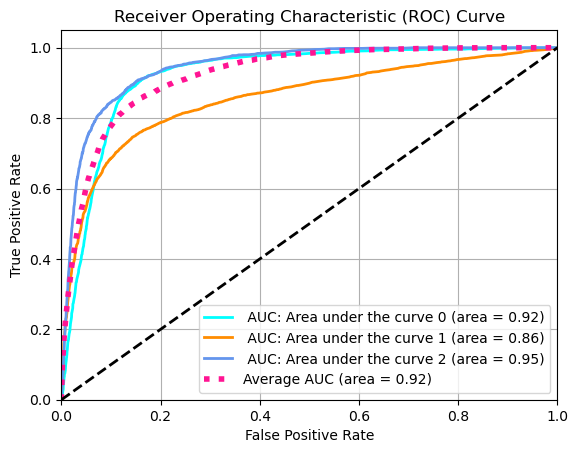

In [60]:
# Plot ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=' AUC: Area under the curve {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], linestyle=':', linewidth=4, color='deeppink',
         label='Average AUC (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# More thoughts
- Using frequency encoding reduced accuracy in the logistic regression and decision tree, but improved accuaracy in the Random Forest model. The Random Forest model has been the most accurate for both dummy encoding and frequency encoding.
- Average AUC of 0.92 for Random Forest Model